# Tutorial 02 - Data Loading

This tutorial demonstrates how to load training data for supervised and weakly trainings from the prepared datasets using the paws API.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from paws.components import DataLoader

datadir = "datasets"

# here we select variables with the index 3, 5 and 6 from the feature array in the dataset by specifying variables="3,3,6";
# they correspond to the jet mass, tau12 and tau23 variables respectively
# for more details of the parameters, use help(DataLoader.__init__)
data_loader = DataLoader(datadir=datadir, feature_level="high_level", decay_modes='qq,qqq',
                         variables="3,5,6", noise_dimension=0, seed=2023)

### Fully supervised datasets

In [4]:
# supervised dataset
datasets = data_loader.get_datasets(mass_point=[500, 100])

# cache dataset
from quickstats import timer
with timer() as t:
    events = list(datasets['train'])
print(f"Loading dedicated dataset (cold run) : {t.interval:.3f}s")
with timer() as t:
    events = list(datasets['train'])
print(f"Loading dedicated dataset (hot run) : {t.interval:.3f}s")

event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 3)
assert event[-1].shape == (1024, 1)
m1, m2 = tf.reduce_mean(event[0][0][tf.reshape(event[-1] == 1, [-1])], axis=0)[:, 0]

# note the mass is in unit of TeV
print(f"m1 : {m1:.3f}, m2 : {m2:.3f}")

2024-06-01 20:27:21.403402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38385 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:27:34.068578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 389245 of 425938
2024-06-01 20:27:34.937544: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


Loading dedicated dataset (cold run) : 11.632s
Loading dedicated dataset (hot run) : 1.064s
m1 : 0.477, m2 : 0.123


More advanced usage

In [6]:
# custom batchsize, cache_dataset, cache_test
datasets = data_loader.get_datasets(mass_point=[500, 100], mu=None, alpha=None,
                                    samples=['QCD', 'W_qq', 'W_qqq'], custom_masses=None, split_index=0,
                                    batchsize=2048, cache_dataset=False, cache_test=False)

from quickstats import timer
with timer() as t:
    events = list(datasets['train'])
print(f"Loading dedicated dataset (cold run) : {t.interval:.3f}s")
with timer() as t:
    events = list(datasets['train'])
print(f"Loading dedicated dataset (hot run) : {t.interval:.3f}s")

event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (2048, 2, 3)
assert event[-1].shape == (2048, 1)

[INFO] Number of events in each dataset split:
            train    val   test
QCD         60700  30327  30325
W_qq        29100  14550  14526
W_qqq       29688  14825  14825
total      119488  59702  59676
num_batch      59     30     30
Loading dedicated dataset (cold run) : 3.558s
Loading dedicated dataset (hot run) : 3.413s


In [7]:
# seed test
data_loader.seed = 2022
datasets = data_loader.get_datasets(mass_point=[500, 100])
event_1 = list(datasets['train'].take(1))[0]
data_loader.seed = 2023
datasets = data_loader.get_datasets(mass_point=[500, 100])
event_2 = list(datasets['train'].take(1))[0]
data_loader.seed = 2023
datasets = data_loader.get_datasets(mass_point=[500, 100])
event_3 = list(datasets['train'].take(1))[0]

print("Seed 1 vs Seed 2 : ", np.array_equal(event_1[0][0].numpy(), event_2[0][0].numpy()))
print("Seed 2 vs Seed 3 : ", np.array_equal(event_2[0][0].numpy(), event_3[0][0].numpy()))

[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:30:06.077058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:874: Filling up shuffle buffer (this may take a while): 394570 of 425938
2024-06-01 20:30:06.908309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:30:17.984194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:1154: Filling up shuffle buffer (this may take a while): 375889 of 425938
2024-06-01 20:30:19.296040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:30:30.306607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:1434: Filling up shuffle buffer (this may take a while): 380669 of 425938


Seed 1 vs Seed 2 :  False
Seed 2 vs Seed 3 :  True


2024-06-01 20:30:31.545027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [8]:
# noise dimension test
data_loader.noise_dimension = 0
datasets = data_loader.get_datasets(mass_point=[500, 100])
event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 3)
data_loader.noise_dimension = 2
datasets = data_loader.get_datasets(mass_point=[500, 100])
event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 4)
data_loader.noise_dimension = 10
datasets = data_loader.get_datasets(mass_point=[500, 100])
event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 8)
data_loader.noise_dimension = 0

[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:31:20.294339: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:1714: Filling up shuffle buffer (this may take a while): 399833 of 425938
2024-06-01 20:31:20.992963: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:31:32.106901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:1998: Filling up shuffle buffer (this may take a while): 366416 of 425938
2024-06-01 20:31:33.846354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:31:44.964228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:2290: Filling up shuffle buffer (this may take a while): 363420 of 425938
2024-06-01 20:31:46.757118: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [9]:
# variables test
data_loader.variables = "1,2,3,4"
datasets = data_loader.get_datasets(mass_point=[500, 100])
event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 4)
# using all variables
data_loader.variables = None
datasets = data_loader.get_datasets(mass_point=[500, 100])
event = list(datasets['train'].take(1))[0]
assert event[0][0].shape == (1024, 2, 7)
data_loader.variables = "3,5,6"

[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


2024-06-01 20:32:05.357237: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:2578: Filling up shuffle buffer (this may take a while): 383183 of 425938
2024-06-01 20:32:06.567621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208


In [10]:
# select samples
datasets = data_loader.get_datasets(mass_point=[500, 100], samples=None)
datasets = data_loader.get_datasets(mass_point=[500, 100], samples=['QCD'])
datasets = data_loader.get_datasets(mass_point=[500, 100], samples=['QCD', 'extra_QCD'])
datasets = data_loader.get_datasets(mass_point=[500, 100], samples=['extra_QCD', 'W_qqq'])

[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        29100   14550   14526
W_qqq       29688   14825   14825
total      425938  212910  212876
num_batch     416     208     208
[INFO] Number of events in each dataset split:
           train    val   test
QCD        60700  30327  30325
total      60700  30327  30325
num_batch     60     30     30
[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
total      367150  183535  183525
num_batch     359     180     180
[INFO] Number of events in each dataset split:
            train     val    test
extra_QCD  306450  153208  153200
W_qqq       29688   14825   14825
total      336138  168033  168025
num_batch     329     165     165


In [12]:
# parameterised dataset, two-prong decay
data_loader = DataLoader(datadir=datadir, feature_level="high_level", decay_modes='qq',
                         variables="3,5,6", noise_dimension=0, seed=2023)
datasets = data_loader.get_datasets(mass_point=None)
events = list(datasets['train'].take(5000))

[INFO] Number of events in each dataset split:
              train       val      test
total      57758533  28872135  28869739
num_batch     56405     28196     28194


2024-06-01 20:36:03.354106: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [13]:
features = np.concatenate([d[0][0] for d in events])
params = np.concatenate([d[0][-1] for d in events])
labels = np.concatenate([d[-1] for d in events])

In [14]:
bkg_indices = (labels == 0).flatten()
sig_indices = (labels == 1).flatten()

In [15]:
unique_param, counts = np.unique(params, return_counts=True, axis=0)
print(f"Number of mass points: {len(unique_param)}")
print(f"Number of events for each mass point: {counts}")

Number of mass points: 144
Number of events for each mass point: [35909 35925 35751 35900 35582 35629 35906 35879 35406 35399 35524 35312
 35931 35933 35909 35780 36062 36234 35804 35582 35659 35925 36143 35182
 35703 36039 35949 35871 35958 35834 35668 35770 35440 35551 35538 35417
 35495 36069 35897 35818 36090 36056 35842 35965 35617 35839 35923 35453
 35027 35796 36014 35980 35670 35869 35971 35651 35738 35360 35723 35415
 35187 35568 35810 35636 35859 35785 35460 35811 35561 35763 35759 35102
 34595 35600 35995 35940 35810 35605 35608 35649 35958 35940 34974 35349
 34787 35374 35729 35972 35907 35931 35644 35819 35727 35745 35792 35435
 34401 34934 35559 35794 35446 35539 35189 35784 35595 35366 35185 34783
 34262 35048 35505 35696 35641 35838 35856 35823 35414 35600 35640 35198
 33982 35018 35209 35533 35489 35290 35599 35442 35584 35357 35419 35087
 33739 34934 35099 35327 35128 35045 35183 35319 35433 35295 34934 34991]


In [17]:
params[sig_indices].shape

(433887, 2)

### Visualize kinematic distributions

In [18]:
import matplotlib.pyplot as plt
from quickstats.plots import VariableDistributionPlot
import pandas as pd
m1, m2 = (500, 100)
dfs = {
    'signal': pd.DataFrame({
        'mj1': features[sig_indices][:, 0, 0],
        'mj2': features[sig_indices][:, 1, 0],
        'm1': params[sig_indices][:, 0],
        'm2': params[sig_indices][:, 1],
    }).query(f'(m1 == {m1}) & (m2 == {m2})'),
    'background': pd.DataFrame({
        'mj1': features[bkg_indices][:, 0, 0],
        'mj2': features[bkg_indices][:, 1, 0],
        'm1': params[bkg_indices][:, 0],
        'm2': params[bkg_indices][:, 1],
    }).query(f'(m1 == {m1}) & (m2 == {m2})')
}
plotter = VariableDistributionPlot(dfs)

[INFO] Using deduced bin range (0.025, 1.105)


<Axes: xlabel='$m_{j1}$ [TeV]', ylabel='Fraction of Events / 0.02'>

<Figure size 640x480 with 0 Axes>

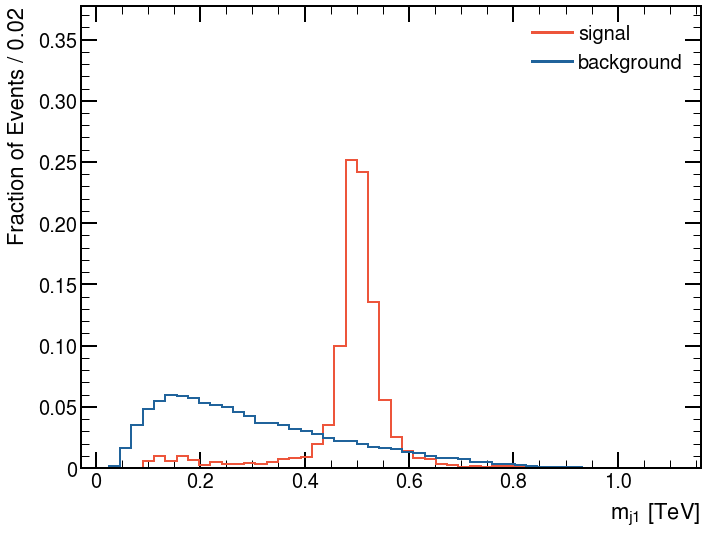

In [19]:
plotter.draw("mj1", xlabel='$m_{j1}$ [TeV]', bins=50)

[INFO] Using deduced bin range (-0.000, 0.774)


<Axes: xlabel='$m_{j2}$ [TeV]', ylabel='Fraction of Events / 0.02'>

<Figure size 640x480 with 0 Axes>

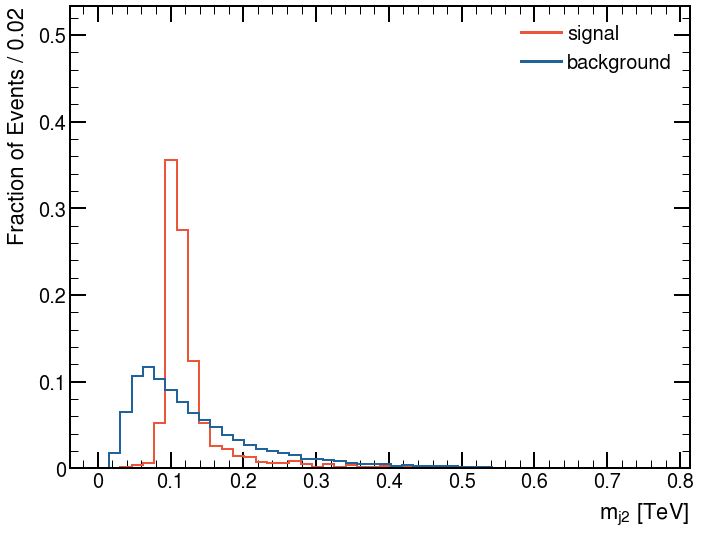

In [20]:
plotter.draw("mj2", xlabel='$m_{j2}$ [TeV]', bins=50)

### Weakly-supervised datasets

In [22]:
# weakly dataset
data_loader = DataLoader(datadir=datadir, feature_level="high_level", decay_modes='qq,qqq',
                         variables="3,5,6", noise_dimension=0, seed=2023)
print('\n(m1, m2) = (500, 100) GeV, mu = 0.1, alpha = 0 (all W->qq)')
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0.1, alpha=0)
print('\n(m1, m2) = (500, 100) GeV, mu = 0.1, alpha = 1 (all W->qqq)')
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0.1, alpha=1)
print('\n(m1, m2) = (500, 100) GeV, mu = 0 (all QCD), alpha = 0 ')
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0, alpha=0)
print('\n(m1, m2) = (500, 100) GeV, mu = 0.0005, alpha = 0.5')
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0.0005, alpha=0.5)


(m1, m2) = (500, 100) GeV, mu = 0.1, alpha = 0 (all W->qq)
[INFO] Number of events in each dataset split:
                              train     val    test
QCD + extra_QCD (label = 0)  183530   91787       0
QCD + extra_QCD (label = 1)  183530   91787       0
W_qq                          20392   10198   14550
W_qqq                             0       0   14838
QCD                               0       0   30350
extra_QCD                         0       0  153225
total                        387452  193772  212963
num_batch                       379     190     208

(m1, m2) = (500, 100) GeV, mu = 0.1, alpha = 1 (all W->qqq)
[INFO] Number of events in each dataset split:
                              train     val    test
QCD + extra_QCD (label = 0)  183530   91787       0
QCD + extra_QCD (label = 1)  183530   91787       0
W_qq                              0       0   14550
W_qqq                         20392   10198   14838
QCD                               0       0   30350
extra

In [23]:
# check distributions at various signal injections
def get_features_df(ds):
    X = np.concatenate([d[0][0] for d in ds])
    Y = np.concatenate([d[-1] for d in ds]).flatten()
    X_0 = X[(Y == 0)]
    X_1 = X[(Y == 1)]
    df_0 = pd.DataFrame({
        'mj1': X_0[:, 0, 0],
        'mj2': X_0[:, 1, 0]
    })
    df_1 = pd.DataFrame({
        'mj1': X_1[:, 0, 0],
        'mj2': X_1[:, 1, 0]
    })
    return df_0, df_1
dfs_0 = {}
dfs_1 = {}
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0, alpha=0.5)
dfs_0['mu_0'], dfs_1['mu_0'] = get_features_df(list(all_ds['train']))
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0.005, alpha=0.5)
dfs_0['mu_0p005'], dfs_1['mu_0p005'] = get_features_df(list(all_ds['train']))
all_ds = data_loader.get_datasets(mass_point=[500, 100], mu=0.1, alpha=0.5)
dfs_0['mu_0p1'], dfs_1['mu_0p1'] = get_features_df(list(all_ds['train']))

[INFO] Number of events in each dataset split:
                              train     val    test
QCD + extra_QCD (label = 0)  183530   91787       0
QCD + extra_QCD (label = 1)  183530   91787       0
W_qq                              0       0   14550
W_qqq                             0       0   14838
QCD                               0       0   30350
extra_QCD                         0       0  153225
total                        367060  183574  212963
num_batch                       359     180     208
[INFO] Number of events in each dataset split:
                              train     val    test
QCD + extra_QCD (label = 0)  183530   91787       0
QCD + extra_QCD (label = 1)  183530   91787       0
W_qq                            461     230   14550
W_qqq                           461     230   14838
QCD                               0       0   30350
extra_QCD                         0       0  153225
total                        367982  184034  212963
num_batch             

2024-06-01 20:40:16.598239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:3984: Filling up shuffle buffer (this may take a while): 361962 of 367982
2024-06-01 20:40:16.776504: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Number of events in each dataset split:
                              train     val    test
QCD + extra_QCD (label = 0)  183530   91787       0
QCD + extra_QCD (label = 1)  183530   91787       0
W_qq                          10196    5099   14550
W_qqq                         10196    5099   14838
QCD                               0       0   30350
extra_QCD                         0       0  153225
total                        387452  193772  212963
num_batch                       379     190     208


2024-06-01 20:40:27.863352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4375: Filling up shuffle buffer (this may take a while): 362352 of 387452
2024-06-01 20:40:28.432261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [24]:
import matplotlib.pyplot as plt
from quickstats.plots import VariableDistributionPlot
label_map = {
    'mu_0': '$\mu = 0$',
    'mu_0p005': '$\mu = 0.005$',
    'mu_0p1': '$\mu = 0.1$'
}

Events with label 0:
[INFO] Using deduced bin range (0.017, 1.173)


<Figure size 640x480 with 0 Axes>

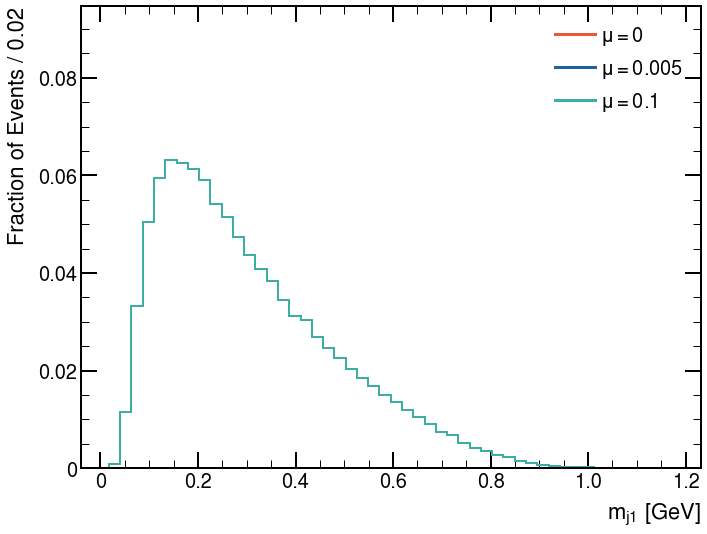

[INFO] Using deduced bin range (-0.000, 0.816)


<Figure size 640x480 with 0 Axes>

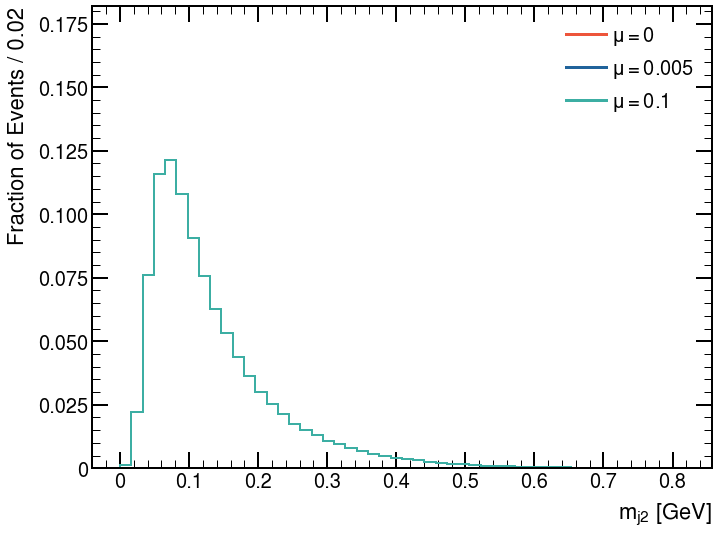

In [25]:
plotter = VariableDistributionPlot(dfs_0, label_map=label_map)
print("Events with label 0:")
plotter.draw("mj1", xlabel="$m_{j1}$ [GeV]", bins=50)
plt.show()
plotter.draw("mj2", xlabel="$m_{j2}$ [GeV]", bins=50)
plt.show()

Events with label 1:
[INFO] Using deduced bin range (0.021, 1.282)


<Figure size 640x480 with 0 Axes>

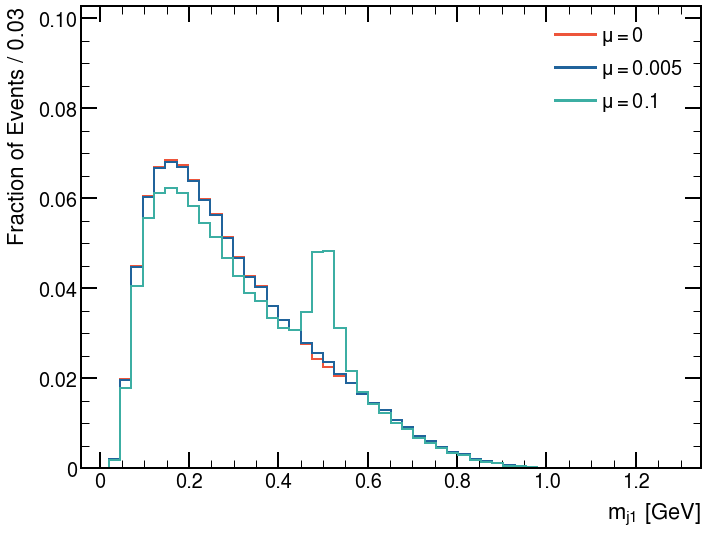

[INFO] Using deduced bin range (-0.000, 0.819)


<Figure size 640x480 with 0 Axes>

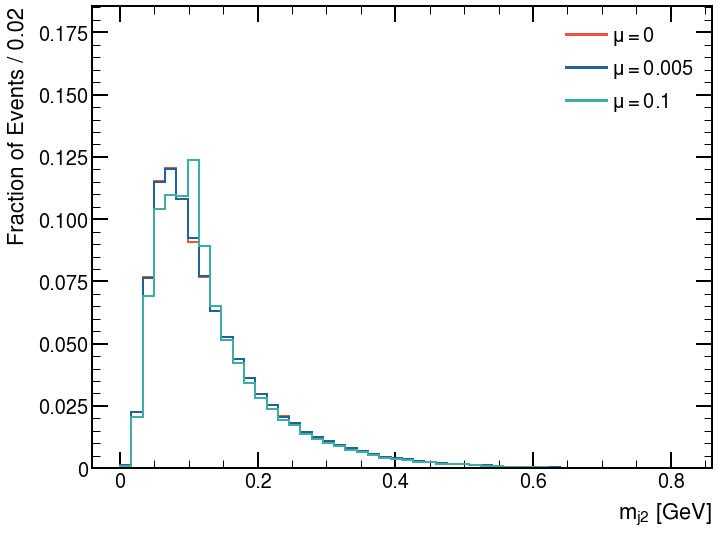

In [26]:
plotter = VariableDistributionPlot(dfs_1, label_map=label_map)
print("Events with label 1:")
plotter.draw("mj1", xlabel="$m_{j1}$ [GeV]", bins=50)
plt.show()
plotter.draw("mj2", xlabel="$m_{j2}$ [GeV]", bins=50)
plt.show()